# Ensembles Practice

This notebook is a practice and general overview of model ensemble methods. Dataset used - https://www.kaggle.com/datasets/saurabh00007/diabetescsv

## Imports / Data load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
raw_diabetes_df = pd.read_csv('data/diabetes.csv')

raw_diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection

In [3]:
# check target col correlations
raw_diabetes_df.corr()["Outcome"] \
    .sort_values(ascending=False) \
    .to_frame()

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [4]:
from mlpeople.eda import describe_dataframe
describe_dataframe(raw_diabetes_df)

,column_id,data_type,unique_values,missing_values,mean,std,min,max
0,Pregnancies,int64,17,0,3.85,3.37,0.00,17.00
1,Glucose,int64,136,0,120.89,31.97,0.00,199.00
2,BloodPressure,int64,47,0,69.11,19.36,0.00,122.00
3,SkinThickness,int64,51,0,20.54,15.95,0.00,99.00
4,Insulin,int64,186,0,79.80,115.24,0.00,846.00
5,BMI,float64,248,0,31.99,7.88,0.00,67.10
6,DiabetesPedigreeFunction,float64,517,0,0.47,0.33,0.08,2.42
7,Age,int64,52,0,33.24,11.76,21.00,81.00
8,Outcome,int64,2,0,0.35,0.48,0.00,1.00


In [5]:
# clean up data from rows where any of "Glucose", "Age", "BMI" is zero value
diabetes_df = raw_diabetes_df[
    (raw_diabetes_df[["Glucose", "Age", "BMI"]] != 0).all(axis=1)
]
describe_dataframe(diabetes_df)

,column_id,data_type,unique_values,missing_values,mean,std,min,max
0,Pregnancies,int64,17,0,3.85,3.38,0.00,17.00
1,Glucose,int64,135,0,121.94,30.60,44.00,199.00
2,BloodPressure,int64,47,0,69.70,18.32,0.00,122.00
3,SkinThickness,int64,51,0,20.72,15.93,0.00,99.00
4,Insulin,int64,185,0,81.35,115.93,0.00,846.00
5,BMI,float64,246,0,32.45,6.93,18.20,67.10
6,DiabetesPedigreeFunction,float64,511,0,0.47,0.33,0.08,2.42
7,Age,int64,52,0,33.31,11.71,21.00,81.00
8,Outcome,int64,2,0,0.35,0.48,0.00,1.00


In [6]:
# use two features to be able to visualize plot_decision_regions
X_age = diabetes_df[['Glucose', 'Age']]
X_bmi = diabetes_df[['Glucose', 'BMI']]
y = diabetes_df['Outcome']

In [7]:
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y, test_size=0.3, stratify=y, random_state=42)
X_bmi_train, X_bmi_test, y_bmi_train, y_bmi_test = train_test_split(X_bmi, y, test_size=0.3, stratify=y, random_state=42)

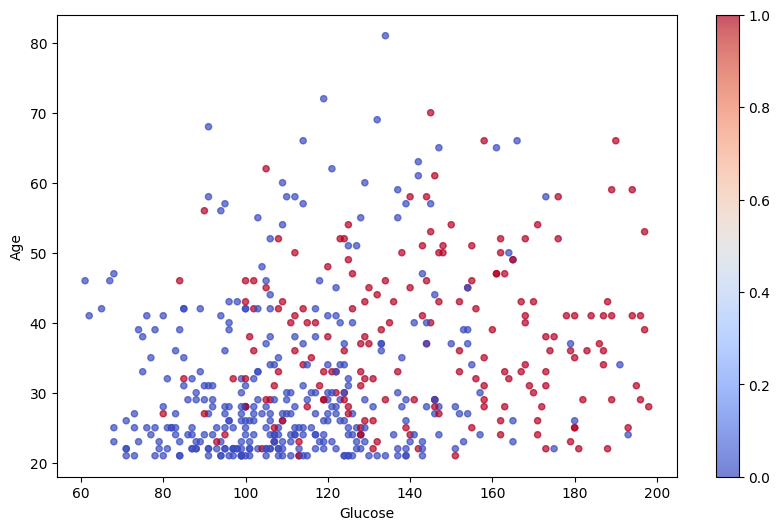

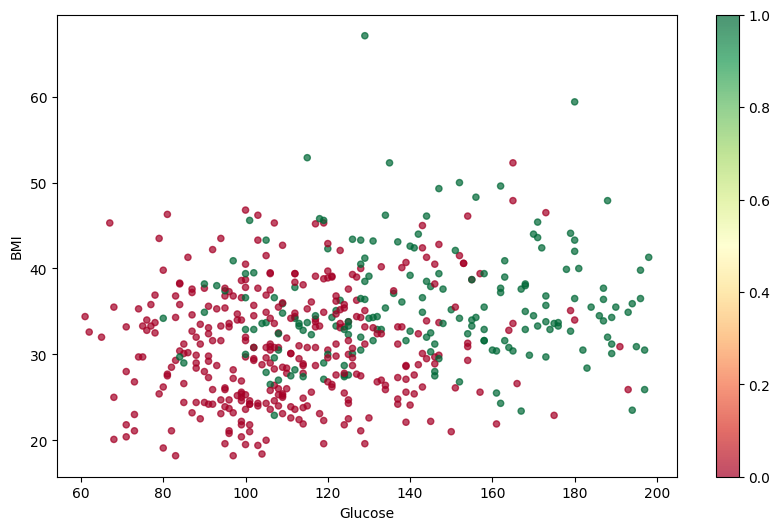

In [8]:
X_age_train.plot.scatter(x='Glucose', y='Age', c=y_age_train, cmap='coolwarm', alpha=0.7, figsize=(10,6))
X_bmi_train.plot.scatter(x='Glucose', y='BMI', c=y_bmi_train, cmap='RdYlGn', alpha=0.7, figsize=(10,6));

## kNN model

In [9]:
import warnings
warnings.filterwarnings('ignore')

def get_report(model, X_test, y_true):
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

def plot_decision_boundary(
    model, X, y,
    figsize=(8,6),
    colors="#1f77b4,#ff7f0e,#3ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf"
):

    plt.figure(figsize=figsize)

    ax = plot_decision_regions(
        X.values,
        y.values,
        model,
        colors=colors
    )

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(f"{model.__class__.__name__} Decision Boundary ({X.columns[0]} vs {X.columns[1]})")
    plt.show()

In [10]:
knn_age = KNeighborsClassifier(n_neighbors=8)
knn_age.fit(X_age_train, y_age_train)
get_report(knn_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7267    0.8503    0.7837       147
           1     0.5926    0.4051    0.4812        79

    accuracy                         0.6947       226
   macro avg     0.6597    0.6277    0.6325       226
weighted avg     0.6799    0.6947    0.6780       226



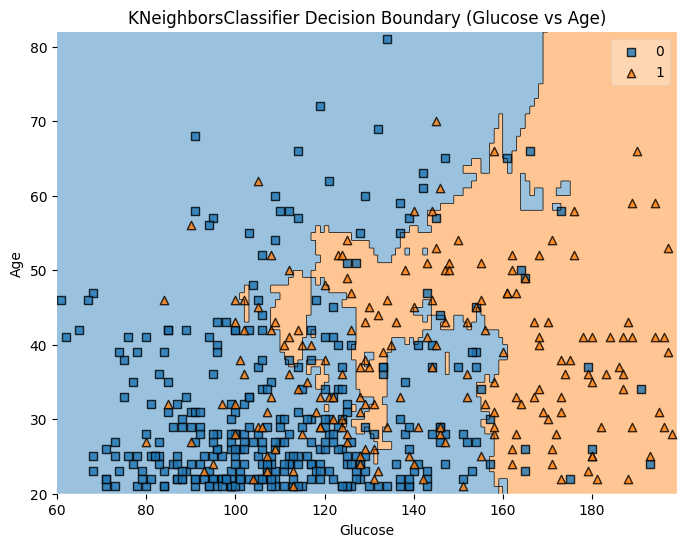

In [11]:
plot_decision_boundary(knn_age, X_age_train, y_age_train)

In [12]:
knn_bmi = KNeighborsClassifier(n_neighbors=8)
knn_bmi.fit(X_bmi_train, y_bmi_train)
get_report(knn_bmi, X_bmi_test, y_bmi_test)

              precision    recall  f1-score   support

           0     0.7158    0.8912    0.7939       147
           1     0.6279    0.3418    0.4426        79

    accuracy                         0.6991       226
   macro avg     0.6719    0.6165    0.6183       226
weighted avg     0.6851    0.6991    0.6711       226



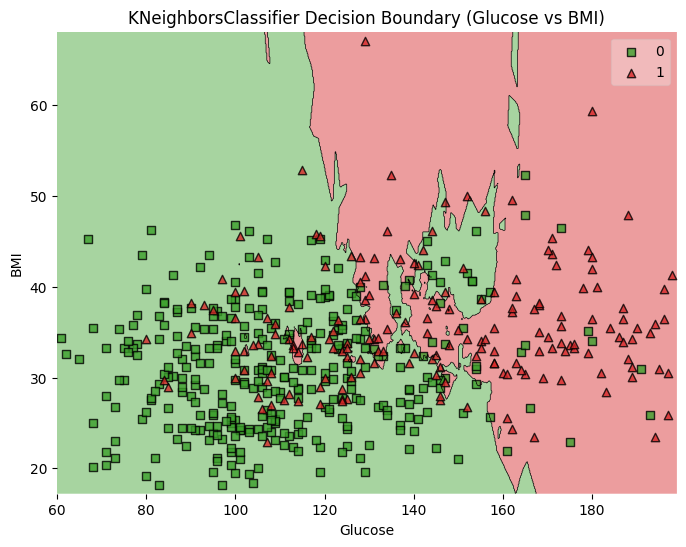

In [13]:
# use different color for bmi everywhere
plot_decision_boundary(knn_bmi, X_bmi_train, y_bmi_train, colors="#3ca02c,#d62728")

## Decision Tree

In [14]:
dt_age = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_age.fit(X_age_train, y_age_train)
get_report(dt_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7273    0.8163    0.7692       147
           1     0.5574    0.4304    0.4857        79

    accuracy                         0.6814       226
   macro avg     0.6423    0.6234    0.6275       226
weighted avg     0.6679    0.6814    0.6701       226



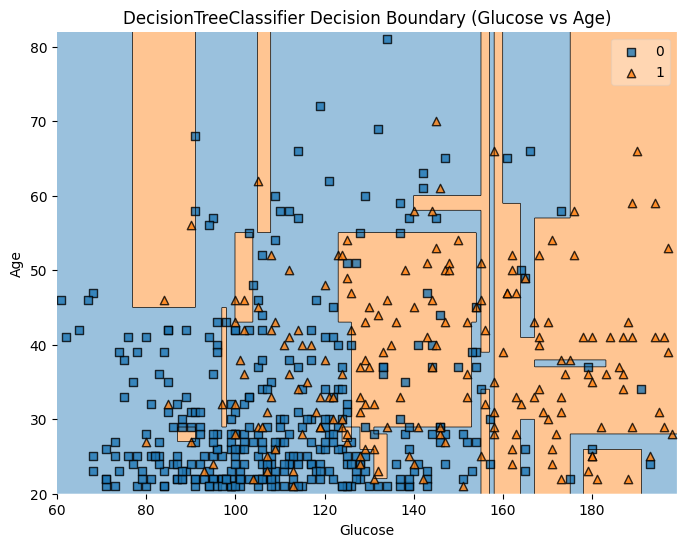

In [15]:
plot_decision_boundary(dt_age, X_age_train, y_age_train)

In [16]:
dt_bmi = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_bmi.fit(X_bmi_train, y_bmi_train)
get_report(dt_bmi, X_bmi_test, y_bmi_test)

              precision    recall  f1-score   support

           0     0.7532    0.7891    0.7708       147
           1     0.5694    0.5190    0.5430        79

    accuracy                         0.6947       226
   macro avg     0.6613    0.6541    0.6569       226
weighted avg     0.6890    0.6947    0.6912       226



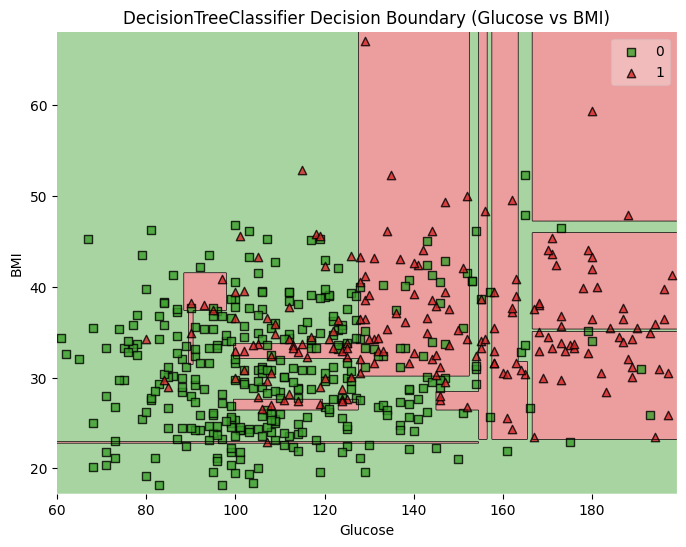

In [17]:
plot_decision_boundary(dt_bmi, X_bmi_train, y_bmi_train, colors="#3ca02c,#d62728")

## Logistic Regression

In [18]:
log_reg_age = LogisticRegression(solver='lbfgs', max_iter = 1000)

log_reg_age.fit(X_age_train, y_age_train)
get_report(log_reg_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7399    0.8707    0.8000       147
           1     0.6415    0.4304    0.5152        79

    accuracy                         0.7168       226
   macro avg     0.6907    0.6506    0.6576       226
weighted avg     0.7055    0.7168    0.7004       226



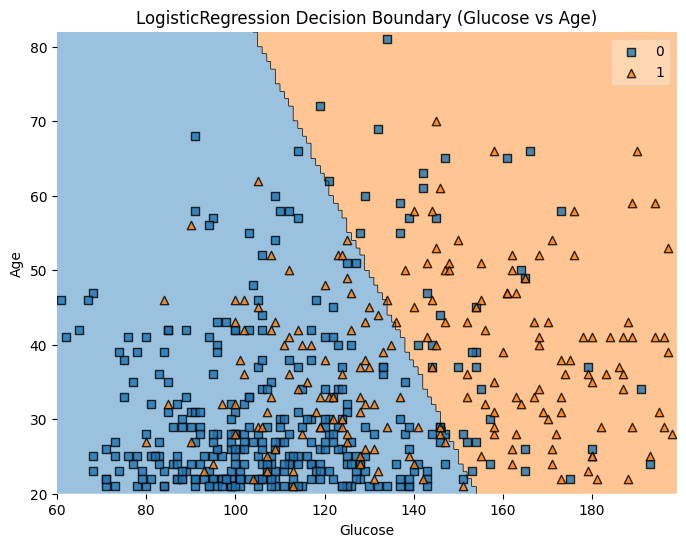

In [19]:
plot_decision_boundary(log_reg_age, X_age_train, y_age_train)

In [20]:
log_reg_bmi = LogisticRegression(solver='lbfgs', max_iter = 1000)

log_reg_bmi.fit(X_bmi_train, y_bmi_train)
get_report(log_reg_bmi, X_bmi_test, y_bmi_test)

              precision    recall  f1-score   support

           0     0.7414    0.8776    0.8037       147
           1     0.6538    0.4304    0.5191        79

    accuracy                         0.7212       226
   macro avg     0.6976    0.6540    0.6614       226
weighted avg     0.7108    0.7212    0.7042       226



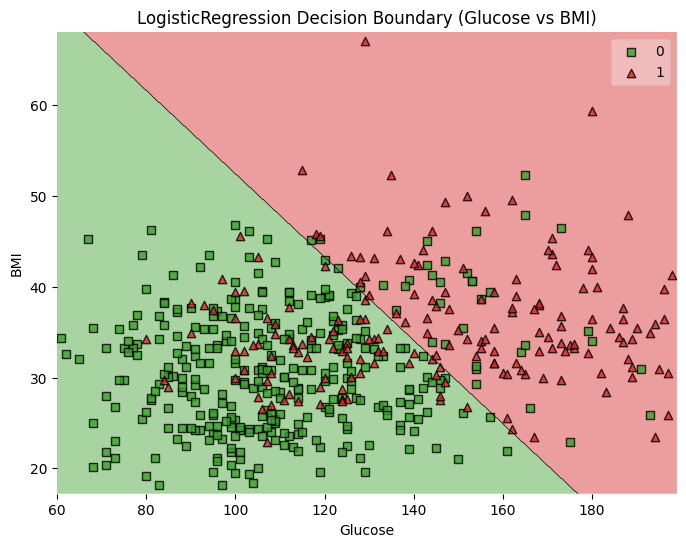

In [21]:
plot_decision_boundary(log_reg_bmi, X_bmi_train, y_bmi_train, colors="#3ca02c,#d62728")

## Ensembling: Voting

**Voting** is an ensemble learning technique that combines predictions from multiple models (called *base estimators*) to produce a single final prediction.

The main idea:

> Multiple weak or diverse models together can make more robust and accurate predictions than a single model.

---

**Why Voting Works**

Voting improves performance by:

- Reducing variance (less overfitting)
- Combining different model biases
- Increasing robustness

It works best when base models are:

- Diverse  
- Independently trained  
- Making different types of errors  

---

### Hard Voting (Default)


- Each model predicts a class label.
- The final prediction is the class that gets the **majority vote**.

Example:

| Model  | Prediction |
|--------|------------|
| KNN    | 1 |
| Tree   | 0 |
| LogReg | 1 |

Final prediction → **1** (majority)

---

In [22]:
from sklearn.ensemble import VotingClassifier

dt_vc = DecisionTreeClassifier(max_depth=7, random_state=42)
knn_vc = KNeighborsClassifier(n_neighbors=8)
log_reg_vc = LogisticRegression(solver='lbfgs')

# models dictionary
estimators=[('knn', knn_vc), ('dt', dt_vc), ('log_reg', log_reg_vc)]

# create voting classifier
ensemble_age = VotingClassifier(estimators)

ensemble_age.fit(X_age_train, y_age_train)
get_report(ensemble_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7456    0.8571    0.7975       147
           1     0.6316    0.4557    0.5294        79

    accuracy                         0.7168       226
   macro avg     0.6886    0.6564    0.6634       226
weighted avg     0.7057    0.7168    0.7038       226



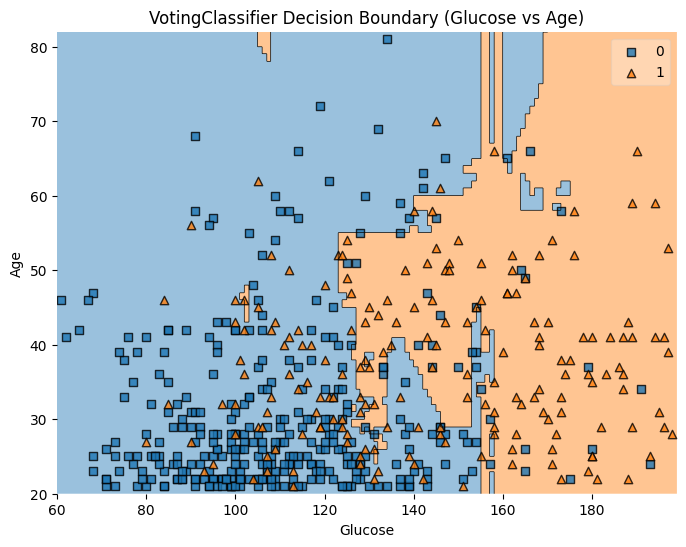

In [23]:
plot_decision_boundary(ensemble_age, X_age_train, y_age_train)

In [24]:
ensemble_age.estimators_

[KNeighborsClassifier(n_neighbors=8),
 DecisionTreeClassifier(max_depth=7, random_state=42),
 LogisticRegression()]

In [25]:
# first 3 rows internal estimators predictions
# last row ensemble prediction
(
    ensemble_age.estimators_[0].predict(X_age_test.iloc[0:20]), # knn
    ensemble_age.estimators_[1].predict(X_age_test.iloc[0:20]), # tree
    ensemble_age.estimators_[2].predict(X_age_test.iloc[0:20]), # log reg
    ensemble_age.predict(X_age_test.iloc[0:20]),
)

(array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]))

              precision    recall  f1-score   support

           0     0.7429    0.8844    0.8075       147
           1     0.6667    0.4304    0.5231        79

    accuracy                         0.7257       226
   macro avg     0.7048    0.6574    0.6653       226
weighted avg     0.7162    0.7257    0.7080       226



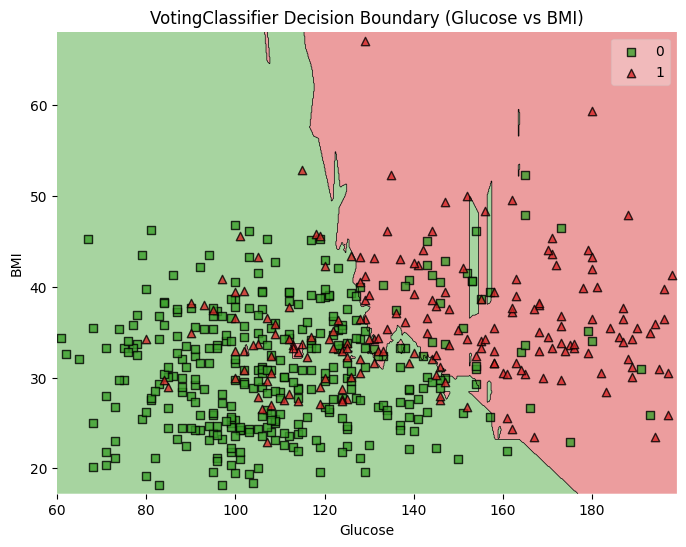

In [26]:
# create voting classifier
ensemble_bmi = VotingClassifier(estimators)

ensemble_bmi.fit(X_bmi_train, y_bmi_train)
get_report(ensemble_bmi, X_bmi_test, y_bmi_test)
plot_decision_boundary(ensemble_bmi, X_bmi_train, y_bmi_train, colors="#3ca02c,#d62728")

### Soft voting

- Each model predicts **class probabilities**.
- The probabilities are averaged.
- The final class is chosen based on the highest averaged probability.

Example:

| Model  | P(class=1) |
|--------|------------|
| KNN    | 0.70 |
| Tree   | 0.60 |
| LogReg | 0.80 |

Average probability → 0.70  
Final prediction → **1**

Soft voting often performs better when models provide well-calibrated probabilities.


In [27]:
ensemble_soft_age = VotingClassifier(estimators, voting='soft')

ensemble_soft_age.fit(X_age_train, y_age_train)
get_report(ensemble_soft_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7440    0.8503    0.7937       147
           1     0.6207    0.4557    0.5255        79

    accuracy                         0.7124       226
   macro avg     0.6824    0.6530    0.6596       226
weighted avg     0.7009    0.7124    0.6999       226



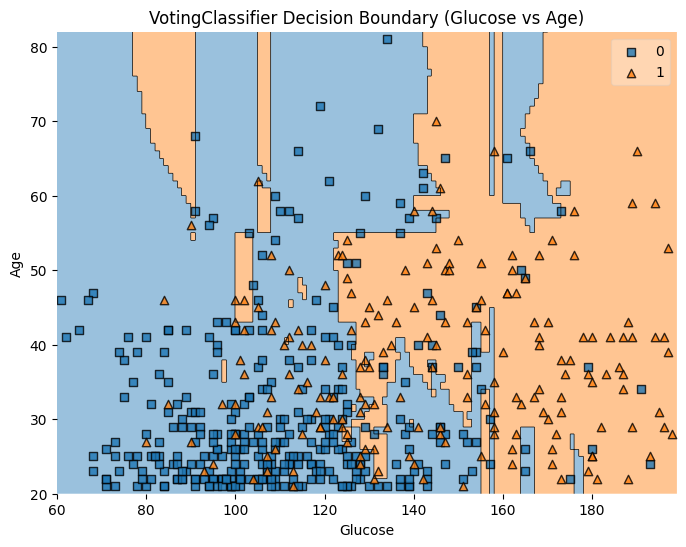

In [28]:
plot_decision_boundary(ensemble_soft_age, X_age_train, y_age_train)

In [29]:
# first 3 rows internal estimators prediction probabilities of 1
# last row ensemble prediction value
(
    ensemble_soft_age.estimators_[0].predict_proba(X_age_test.iloc[0:7])[:, 1].round(3), # knn
    ensemble_soft_age.estimators_[1].predict_proba(X_age_test.iloc[0:7])[:, 1].round(3), # tree
    ensemble_soft_age.estimators_[2].predict_proba(X_age_test.iloc[0:7])[:, 1].round(3), # log reg
    ensemble_soft_age.predict(X_age_test.iloc[0:7]).round(3),
)

(array([0.5  , 0.625, 0.5  , 0.125, 0.125, 0.125, 0.625]),
 array([0.4  , 0.576, 0.4  , 0.086, 0.086, 0.   , 0.417]),
 array([0.185, 0.385, 0.772, 0.141, 0.181, 0.088, 0.321]),
 array([0, 1, 1, 0, 0, 0, 0]))

### Soft voting with weight

In [30]:
# make log reg to have a bit more weight and tree a bit less
ensemble_soft_age_w = VotingClassifier(estimators, voting='soft', weights=[2,1,3])

ensemble_soft_age_w.fit(X_age_train, y_age_train)
get_report(ensemble_soft_age_w, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7457    0.8776    0.8063       147
           1     0.6604    0.4430    0.5303        79

    accuracy                         0.7257       226
   macro avg     0.7030    0.6603    0.6683       226
weighted avg     0.7159    0.7257    0.7098       226



In [31]:
(
    ensemble_soft_age_w.estimators_[0].predict_proba(X_age_test.iloc[0:7])[:, 1].round(3), # knn
    ensemble_soft_age_w.estimators_[1].predict_proba(X_age_test.iloc[0:7])[:, 1].round(3), # tree
    ensemble_soft_age_w.estimators_[2].predict_proba(X_age_test.iloc[0:7])[:, 1].round(3), # log reg
    ensemble_soft_age_w.predict(X_age_test.iloc[0:7]).round(3),
)

(array([0.5  , 0.625, 0.5  , 0.125, 0.125, 0.125, 0.625]),
 array([0.4  , 0.576, 0.4  , 0.086, 0.086, 0.   , 0.417]),
 array([0.185, 0.385, 0.772, 0.141, 0.181, 0.088, 0.321]),
 array([0, 0, 1, 0, 0, 0, 0]))

              precision    recall  f1-score   support

           0     0.7679    0.8776    0.8190       147
           1     0.6897    0.5063    0.5839        79

    accuracy                         0.7478       226
   macro avg     0.7288    0.6919    0.7015       226
weighted avg     0.7405    0.7478    0.7369       226



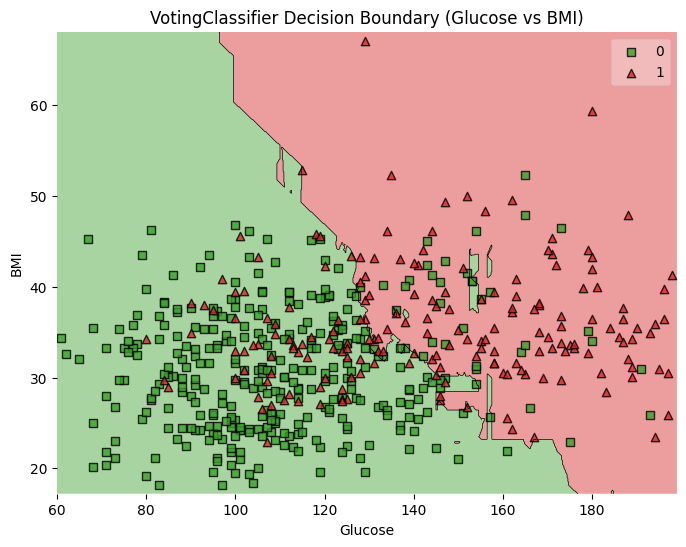

In [32]:
ensemble_soft_bmi = VotingClassifier(estimators, voting='soft', weights=[2,1,3])

ensemble_soft_bmi.fit(X_bmi_train, y_bmi_train)
get_report(ensemble_soft_bmi, X_bmi_test, y_bmi_test)
plot_decision_boundary(ensemble_soft_bmi, X_bmi_train, y_bmi_train, colors="#3ca02c,#d62728")

### Hard voting with weights

              precision    recall  f1-score   support

           0     0.7333    0.8980    0.8073       147
           1     0.6739    0.3924    0.4960        79

    accuracy                         0.7212       226
   macro avg     0.7036    0.6452    0.6517       226
weighted avg     0.7126    0.7212    0.6985       226



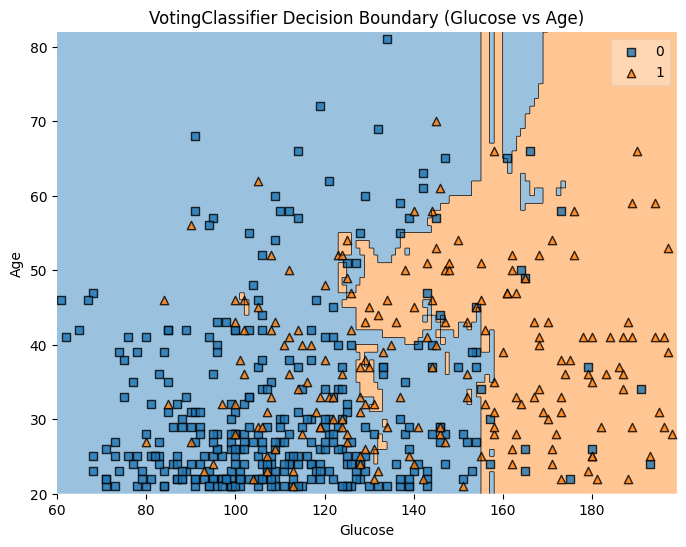

In [33]:
# create more weak estimators for better hrad voting experiment - in case of just 3 hard voting weights does not make much sense
estimators_hard_ext = [
    ('knn_8', KNeighborsClassifier(n_neighbors=8)),
    ('knn_4', KNeighborsClassifier(n_neighbors=4)),
    ('dt_7', DecisionTreeClassifier(max_depth=7, random_state=42)),
    ('dt_2', DecisionTreeClassifier(max_depth=2, random_state=42)),
    ('dt_20', DecisionTreeClassifier(max_depth=20, random_state=42)),
    ('log_reg', log_reg_vc)
]

# 2 knn models with weight 2, 3 tree models with weight 1 and 1 log reg with weight 3
weights = [2, 2, 1, 1, 1, 3]
ensemble_hard_age_w = VotingClassifier(estimators_hard_ext, voting='hard', weights=weights)

ensemble_hard_age_w.fit(X_age_train, y_age_train)
get_report(ensemble_hard_age_w, X_age_test, y_age_test)
plot_decision_boundary(ensemble_hard_age_w, X_age_train, y_age_train)

In [34]:
# first internal estimators predictions
# last row ensemble prediction value
# second value is weight of this prediction
preds = [(estimator.predict(X_age_test.iloc[0:15]), weight) for estimator, weight in zip(ensemble_hard_age_w.estimators_, weights)]
preds.append((ensemble_hard_age_w.predict(X_age_test.iloc[0:15]), 10))
preds


[(array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]), 2),
 (array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]), 2),
 (array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]), 1),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]), 1),
 (array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1]), 1),
 (array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]), 3),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]), 10)]

### Even more estimators

              precision    recall  f1-score   support

           0     0.7529    0.8707    0.8076       147
           1     0.6607    0.4684    0.5481        79

    accuracy                         0.7301       226
   macro avg     0.7068    0.6696    0.6779       226
weighted avg     0.7207    0.7301    0.7169       226



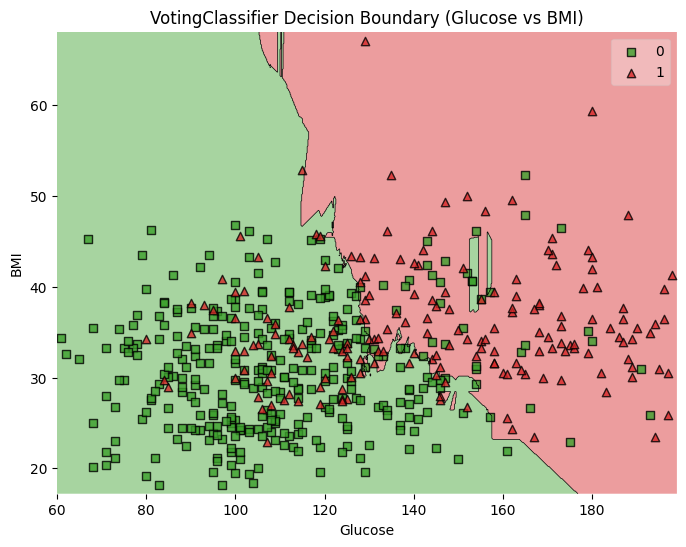

In [35]:
# Build estimators dynamically
estimators_ext = []

# KNN models
for k in [5, 7, 9]:
    estimators_ext.append(
        (f"knn_{k}", KNeighborsClassifier(n_neighbors=k))
    )

# Decision Trees
for depth in range(4, 10):
    estimators_ext.append(
        (f"dt_{depth}", DecisionTreeClassifier(max_depth=depth, random_state=42))
    )

# Logistic Regression
log_reg_configs = [
    ("log_reg_1", LogisticRegression(solver="lbfgs")),
    ("log_reg_3", LogisticRegression(solver="liblinear", penalty="l1")),
]

estimators_ext.extend(log_reg_configs)

# Weights (match order!)
weights = (
    [2]*3 +     # knn
    [1]*6 +     # decision trees
    [3]*2       # logistic regression
)

# Voting classifier
ensemble_bmi_ext = VotingClassifier(
    estimators=estimators_ext,
    voting="hard",
    weights=weights
)

ensemble_bmi_ext.fit(X_bmi_train, y_bmi_train)

get_report(ensemble_bmi_ext, X_bmi_test, y_bmi_test)
plot_decision_boundary(
    ensemble_bmi_ext,
    X_bmi_train,
    y_bmi_train,
    colors="#3ca02c,#d62728"
)

In [36]:
# first internal estimators predictions
# last row ensemble prediction value
preds = [(estimator.predict(X_bmi_test.iloc[35:55]), weight) for estimator, weight in zip(ensemble_bmi_ext.estimators_, weights)]
preds.append((ensemble_bmi_ext.predict(X_bmi_test.iloc[35:55]), sum(weights)))
preds


[(array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]), 2),
 (array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]), 2),
 (array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]), 2),
 (array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]), 1),
 (array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]), 1),
 (array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]), 1),
 (array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]), 1),
 (array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]), 1),
 (array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]), 1),
 (array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]), 3),
 (array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]), 3),
 (array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]), 18)]

## Stacking

**Ensembling: Stacking Method (Stacked Generalization)** is an ensemble learning technique that combines multiple base models by training a new model (called a *meta-model*) to learn how to best combine their predictions.

Instead of simple averaging or majority voting, stacking **learns** the optimal way to combine models.

---

Stacking is a two-level process:

1. Level 0 — Base Models

Several different models are trained on the original dataset.

Example:
- KNN
- Decision Tree
- Logistic Regression

Each model makes predictions.

---

 2. Level 1 — Meta-Model

A new model (meta-model) is trained on the predictions of the base models.

For example:

| KNN Prob | Tree Prob | LogReg Prob | Final Target |
|----------|-----------|-------------|--------------|
| 0.70     | 0.60      | 0.80        | 1 |
| 0.20     | 0.40      | 0.30        | 0 |

The meta-model learns how to combine these outputs to produce a final prediction.

---

**Why Stacking Works**

Stacking improves performance by:

- Learning optimal model combinations
- Reducing bias and variance
- Capturing patterns that single models miss

Unlike voting, stacking does **not** treat all models equally — it learns which models to trust more.

---

**Important Detail: Cross-Validation**

During training, stacking uses **cross-validated predictions** from base models to avoid data leakage.

This ensures the meta-model does not overfit.

### Age

In [37]:
from sklearn.ensemble import StackingClassifier

dt_sc = DecisionTreeClassifier(max_depth=7, random_state=42)
knn_sc = KNeighborsClassifier(n_neighbors=8)
log_reg_sc = LogisticRegression(solver='lbfgs')


estimators=[('knn', dt_sc), ('dt', knn_sc), ('log_reg', log_reg_sc)]
stacking_clf_age = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_clf_age.fit(X_age_train, y_age_train)
get_report(stacking_clf_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7429    0.8844    0.8075       147
           1     0.6667    0.4304    0.5231        79

    accuracy                         0.7257       226
   macro avg     0.7048    0.6574    0.6653       226
weighted avg     0.7162    0.7257    0.7080       226



In [38]:
stacking_clf_age

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('knn', ...), ('dt', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",LogisticRegression()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",7
,"min_samples_split min_samples_split: int or float, default=2The minimum number of s

In [39]:
# check if all weak estimators prediction is 0.5
(
    stacking_clf_age.final_estimator_.predict_proba([[0.5,0.5,0.5]]),
    stacking_clf_age.final_estimator_.predict([[0.5,0.5,0.5]])
)

(array([[0.51699851, 0.48300149]]), array([0]))

In [40]:
X_slice = X_age_test.iloc[0:7]

# collect base estimator probabilities
meta_features = np.column_stack([
    est.predict_proba(X_slice)[:, 1]
    for est in stacking_clf_age.estimators_
])

(
    (stacking_clf_age.estimators_[0].predict_proba(X_slice)[:, 1].round(3),'knn'),
    (stacking_clf_age.estimators_[1].predict_proba(X_slice)[:, 1].round(3),'dt'),
    (stacking_clf_age.estimators_[2].predict_proba(X_slice)[:, 1].round(3),'log_reg'),
    (stacking_clf_age.predict_proba(X_slice)[:, 1].round(3),'final'),                         # final pred prob
    (stacking_clf_age.final_estimator_.predict_proba(meta_features)[:, 1].round(3),'final from meta'),  # manual final pred prob to check if match
    (stacking_clf_age.predict(X_slice),'final class'),
)

((array([0.4  , 0.576, 0.4  , 0.086, 0.086, 0.   , 0.417]), 'knn'),
 (array([0.5  , 0.625, 0.5  , 0.125, 0.125, 0.125, 0.625]), 'dt'),
 (array([0.185, 0.385, 0.772, 0.141, 0.181, 0.088, 0.321]), 'log_reg'),
 (array([0.307, 0.486, 0.623, 0.146, 0.158, 0.128, 0.435]), 'final'),
 (array([0.307, 0.486, 0.623, 0.146, 0.158, 0.128, 0.435]), 'final from meta'),
 (array([0, 0, 1, 0, 0, 0, 0]), 'final class'))

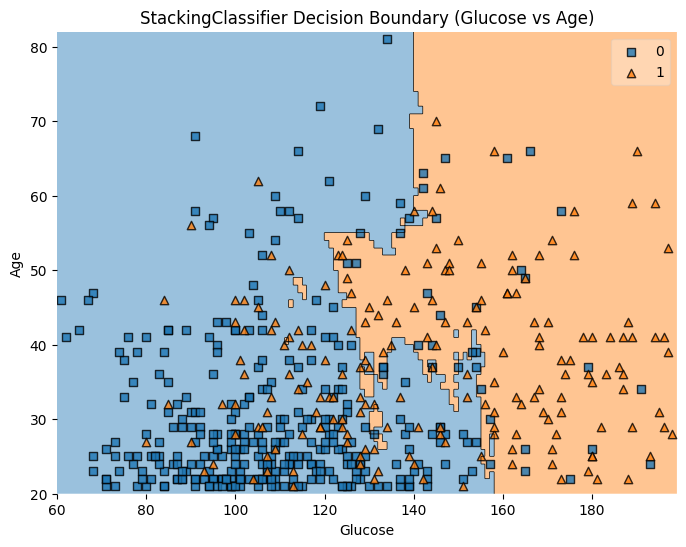

In [41]:
plot_decision_boundary(stacking_clf_age, X_age_train, y_age_train)

### BMI

              precision    recall  f1-score   support

           0     0.7386    0.8844    0.8050       147
           1     0.6600    0.4177    0.5116        79

    accuracy                         0.7212       226
   macro avg     0.6993    0.6510    0.6583       226
weighted avg     0.7111    0.7212    0.7024       226



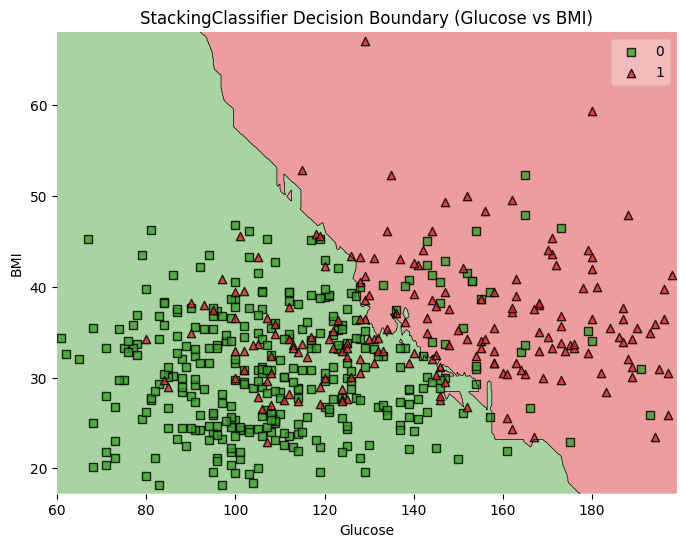

In [42]:
from sklearn.ensemble import StackingClassifier

dt_sc = DecisionTreeClassifier(max_depth=7, random_state=42)
knn_sc = KNeighborsClassifier(n_neighbors=8)
log_reg_sc = LogisticRegression(solver='lbfgs')


estimators=[('knn', dt_sc), ('dt', knn_sc), ('log_reg', log_reg_sc)]
stacking_clf_bmi = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_clf_bmi.fit(X_bmi_train, y_bmi_train)
get_report(stacking_clf_bmi, X_bmi_test, y_bmi_test)
plot_decision_boundary(stacking_clf_bmi, X_bmi_train, y_bmi_train, colors="#3ca02c,#d62728")

## Ensembling: Bagging / Pasting

**Bagging (Bootstrap Aggregating)** and **Pasting** are ensemble techniques that train multiple copies of the same model on different subsets of the data and then combine their predictions.

The main idea:

> By training multiple models on slightly different data, we can reduce variance and improve robustness.

---

**How It Works** 

1. Generate multiple datasets by sampling the training data (with or without replacement).  
2. Train a **base model** on each dataset.  
3. Combine predictions using:
   - **Majority vote** (classification)
   - **Average** (regression)

---

**Example with Decision Trees**

- Train 10 trees on different bootstrapped datasets.  
- Each tree predicts independently.  
- Final prediction = majority vote (classification) or average (regression).

---
### Bagging vs Pasting

| Technique | Sampling Method | With Replacement? |
|-----------|----------------|-----------------|
| Bagging  | Random subsets of training data | Yes |
| Pasting  | Random subsets of training data | No  |

**Bagging** uses **bootstrapped samples** (some samples may repeat).  
**Pasting** uses **disjoint subsets** (no duplicates).

---

**Why Bagging Works**

Bagging reduces **variance**:

- Individual models may overfit, but combining them smooths out errors.
- Works especially well with **unstable models** (e.g., decision trees).

Pasting does not use replacement, so each model sees slightly different data — still reduces variance but less randomness than bagging.

---

### Age - Bagging

              precision    recall  f1-score   support

           0     0.7574    0.8707    0.8101       147
           1     0.6667    0.4810    0.5588        79

    accuracy                         0.7345       226
   macro avg     0.7120    0.6759    0.6845       226
weighted avg     0.7257    0.7345    0.7223       226



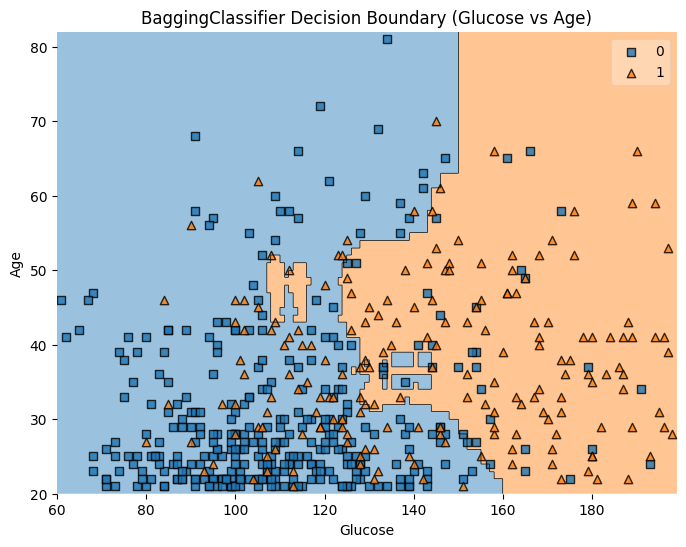

In [43]:
from sklearn.ensemble import BaggingClassifier

# build 100 simple trees (max_depth=5) and use 10% of random train data for each tree
bag_clf_age = BaggingClassifier(
    DecisionTreeClassifier(random_state=42, max_depth=5),
    n_estimators=100,
    max_samples=0.1,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
bag_clf_age.fit(X_age_train, y_age_train)

get_report(bag_clf_age, X_age_test, y_age_test)
plot_decision_boundary(bag_clf_age, X_age_train, y_age_train)

### bootstrap=False - for Pasting

              precision    recall  f1-score   support

           0     0.7640    0.8367    0.7987       147
           1     0.6308    0.5190    0.5694        79

    accuracy                         0.7257       226
   macro avg     0.6974    0.6779    0.6841       226
weighted avg     0.7174    0.7257    0.7186       226



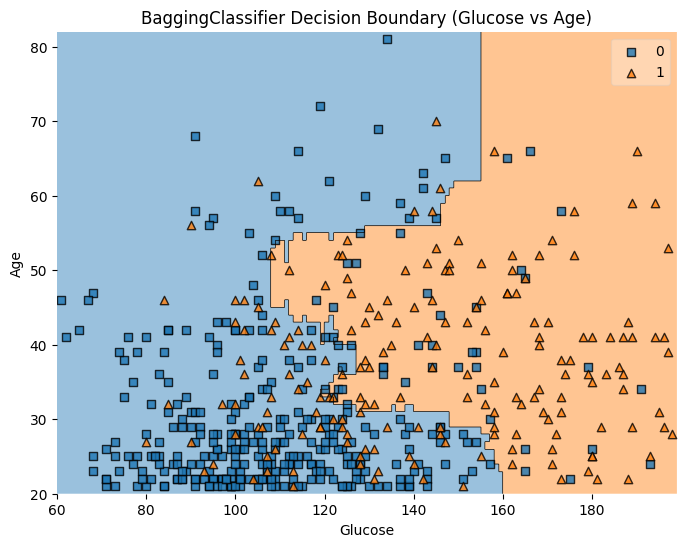

In [44]:
from sklearn.ensemble import BaggingClassifier

# same with bootstrap=False param
bag_clf_age_p = BaggingClassifier(
    DecisionTreeClassifier(random_state=42, max_depth=5),
    n_estimators=100,
    max_samples=0.1,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)
bag_clf_age_p.fit(X_age_train, y_age_train)

get_report(bag_clf_age_p, X_age_test, y_age_test)
plot_decision_boundary(bag_clf_age_p, X_age_train, y_age_train)

### BMI

              precision    recall  f1-score   support

           0     0.7544    0.8776    0.8113       147
           1     0.6727    0.4684    0.5522        79

    accuracy                         0.7345       226
   macro avg     0.7136    0.6730    0.6818       226
weighted avg     0.7258    0.7345    0.7208       226



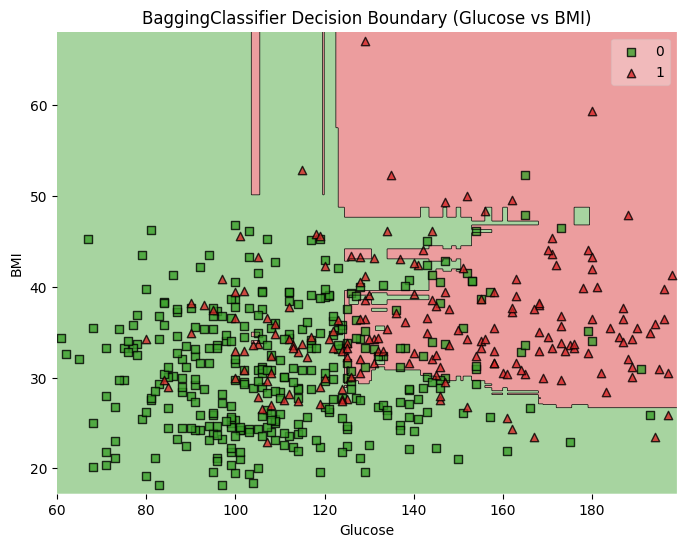

In [45]:
# use 20 tree with depth 5 and 10% of data for each
bag_clf_bmi= BaggingClassifier(
    DecisionTreeClassifier(random_state=42, max_depth=5),
    n_estimators=20,
    max_samples=0.1,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
bag_clf_bmi.fit(X_bmi_train, y_bmi_train)

get_report(bag_clf_bmi, X_bmi_test, y_bmi_test)
plot_decision_boundary(bag_clf_bmi, X_bmi_train, y_bmi_train, colors="#3ca02c,#d62728")

## Random Forest

**Random Forest** is an ensemble learning method that builds **many decision trees** using bagging and combines their predictions.

It is essentially a **Bagging model with additional randomness**:

- Each tree is trained on a **bootstrapped subset** of the training data (bagging).  
- At each split in the tree, only a **random subset of features** is considered.  

This extra randomness reduces correlation between trees and improves generalization.


              precision    recall  f1-score   support

           0     0.7545    0.8571    0.8025       147
           1     0.6441    0.4810    0.5507        79

    accuracy                         0.7257       226
   macro avg     0.6993    0.6691    0.6766       226
weighted avg     0.7159    0.7257    0.7145       226



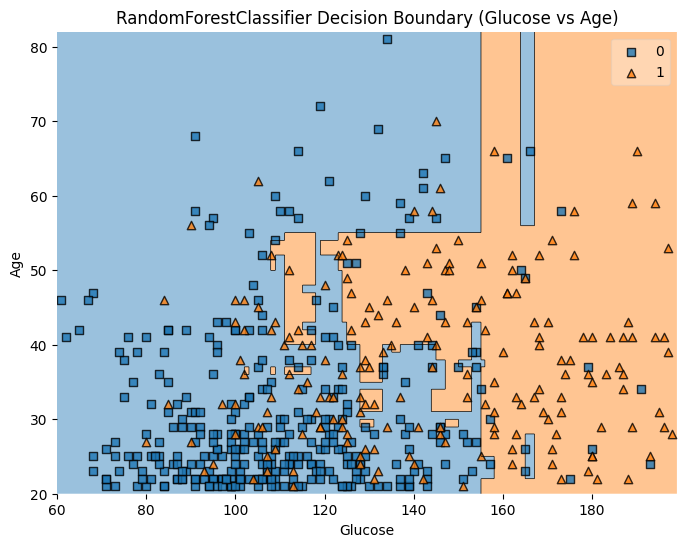

In [46]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf_age = RandomForestClassifier(n_estimators=20, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf_age.fit(X_age_train, y_age_train)

get_report(rnd_clf_age, X_age_test, y_age_test)
plot_decision_boundary(rnd_clf_age, X_age_train, y_age_train)

### Hyperparams tuning

In [47]:
rf = RandomForestClassifier(random_state=42)
params_rf = {
    'n_estimators': [1, 5, 10, 20, 50, 100],
    'max_leaf_nodes':[4,8,16,32,64],
    'max_depth': [5,8,16]
}
rf_gs_age = GridSearchCV(rf, params_rf, cv=5, scoring='f1_micro')
rf_gs_age.fit(X_age_train, y_age_train)
rf_best_age = rf_gs_age.best_estimator_
print(rf_gs_age.best_params_)

get_report(rf_best_age, X_age_test, y_age_test)

{'max_depth': 8, 'max_leaf_nodes': 8, 'n_estimators': 100}
              precision    recall  f1-score   support

           0     0.7515    0.8639    0.8038       147
           1     0.6491    0.4684    0.5441        79

    accuracy                         0.7257       226
   macro avg     0.7003    0.6662    0.6740       226
weighted avg     0.7157    0.7257    0.7130       226



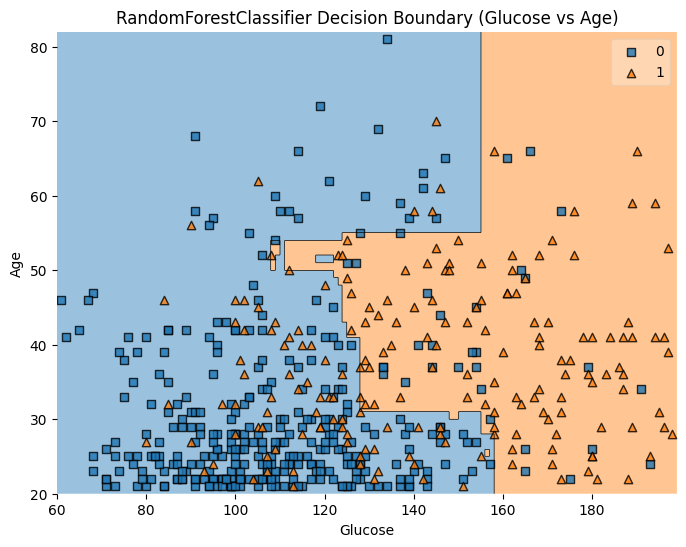

In [48]:
plot_decision_boundary(rf_best_age, X_age_train, y_age_train)